## Introduction

Clustering metrics play a pivotal role in evaluating the effectiveness of machine learning algorithms designed to group similar data points. These metrics provide quantitative measures to assess the quality of clusters formed, helping practitioners choose optimal algorithms for diverse datasets. By gauging factors like compactness, separation, and variance, clustering metrics such as silhouette score, Davies–Bouldin index, and Calinski-Harabasz index offer insights into the performance of clustering techniques. Understanding and applying these metrics contribute to the refinement and selection of clustering algorithms, fostering better insights in unsupervised learning scenarios.

## Silhouette Score (Silhouette Index)

The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters. It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.

The Silhouette Score is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The formula for the Silhouette Score is given by:

$$s = \frac{b - a}{max(a, b)}$$

where:
- a is the mean intra-cluster distance, and
- b is the mean nearest-cluster distance.

The typical Silhouette Plots represent the cluster label on the y-axis, while the actual Silhouette Score on the x-axis. The size/thickness of the silhouettes is also proportional to the number of samples inside that cluster.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate sample data
X, _ = make_blobs(n_samples=500, centers = 4, cluster_std = 0.60, random_state = 0)

# Perform K-means clustering
kmeans = KMeans(n_clusters = 4, random_state=0)
cluster_labels = kmeans.fit(X)

pred = kmeans.predict(X)

# Compute the silhouette scores for each sample
silhouette_avg = silhouette_score(X, pred)
sample_silhouette_values = silhouette_samples(X, pred)

print(f'Average silhouette score: {silhouette_avg}')


Average silhouette score: 0.6844837346859131


In [4]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

KMeans(n_clusters=3)

Text(0, 0.5, 'Cluster label')

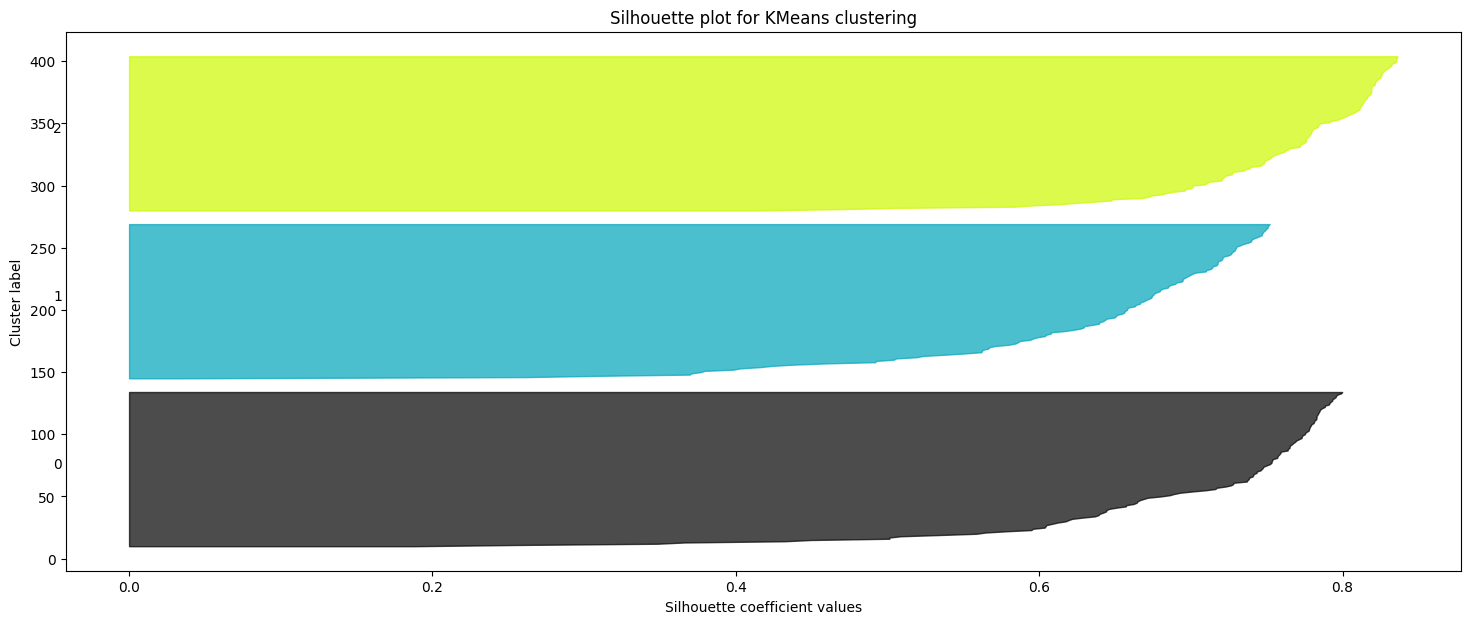

In [5]:
import matplotlib.pyplot as plt

# Plotting Silhouette coefficients
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

y_lower = 10
for i in range(3):
    cluster_i = sample_silhouette_values[pred == i]
    cluster_i.sort()
    y_upper = y_lower + cluster_i.shape[0]

    color = plt.cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * cluster_i.shape[0], str(i))
    y_lower = y_upper + 10
    
ax.set_title("Silhouette plot for KMeans clustering")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

The higher the Silhouette Coefficients (the closer to +1), the further away the cluster’s samples are from the neighbouring clusters samples. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighbouring clusters. Negative values, instead, indicate that those samples might have been assigned to the wrong cluster. Averaging the Silhouette Coefficients, we can get to a global Silhouette Score which can be used to describe the entire population’s performance with a single value.

Let’s try to understand how the Silhouette Plot can help us find the best number of clusters by looking at the performance of each configuration:

Using “K=2”, meaning two clusters to separate the population, we achieve an average Silhouette Score of 0.70.

In [6]:
Kmean2 = KMeans(n_clusters = 2)
Kmean2.fit(X)

KMeans(n_clusters=2)

In [7]:
pred2 = Kmean2.predict(X)

silhouette_avg2 = silhouette_score(X, pred2)
sample_silhouette_values2 = silhouette_samples(X, pred2)

print(f'Average silhouette score for 2 clusters: {silhouette_avg2}')

Average silhouette score for 2 clusters: 0.5563472486373936


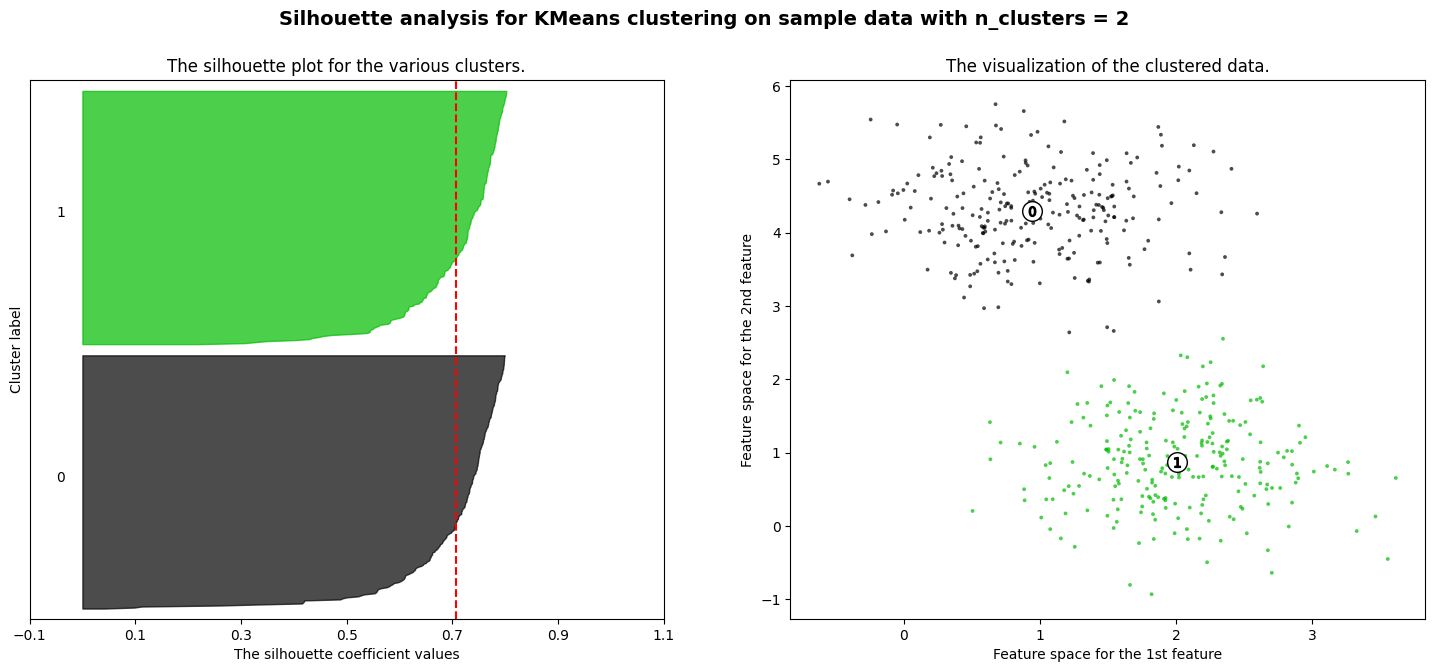

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=0.60, random_state=0)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Compute the silhouette scores for each sample
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (2 + 1) * 10])

y_lower = 10
for i in range(2):
    cluster_i = sample_silhouette_values[cluster_labels == i]
    cluster_i.sort()
    y_upper = y_lower + cluster_i.shape[0]

    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * cluster_i.shape[0], str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# Visualization of clustered data
colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Draw white circles at cluster centers
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2),
             fontsize=14, fontweight='bold')

plt.show()


Increasing the number to “K=3”, we get:

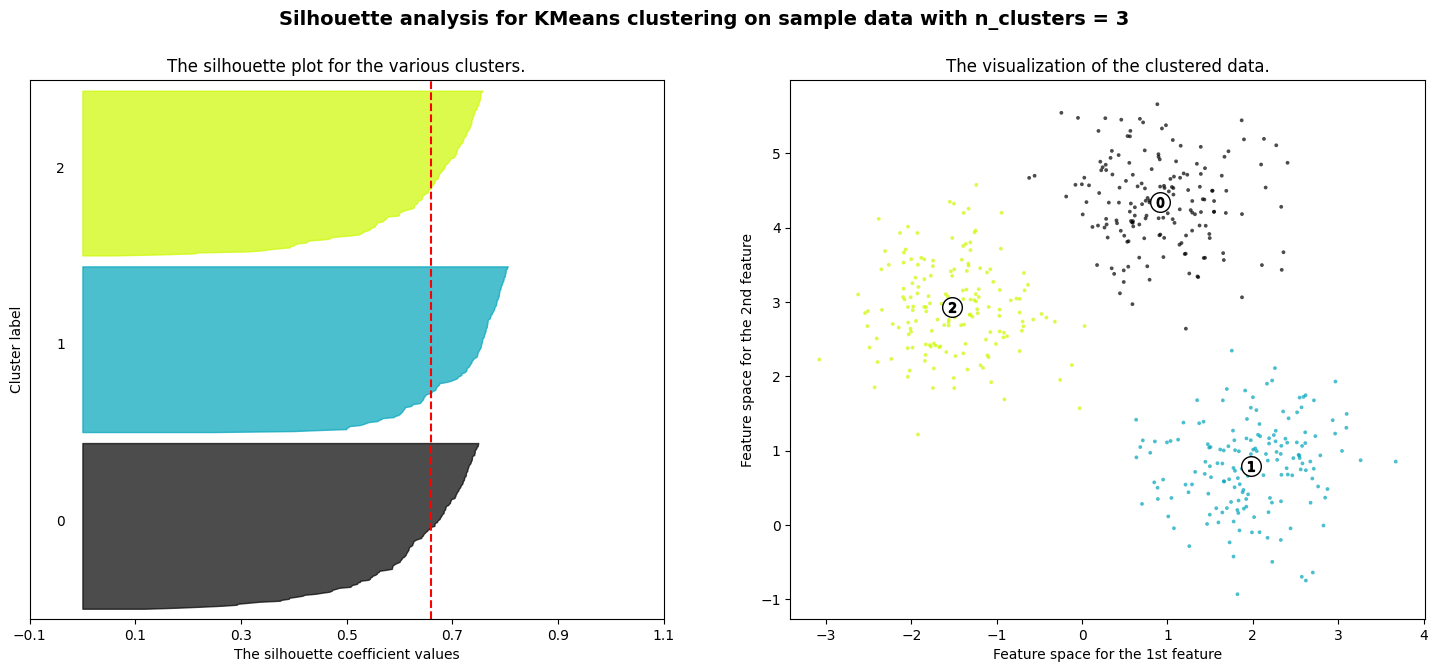

In [9]:
# Generate sample data
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)

# Number of clusters
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Compute the silhouette scores for each sample
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    cluster_i = sample_silhouette_values[cluster_labels == i]
    cluster_i.sort()
    y_upper = y_lower + cluster_i.shape[0]

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * cluster_i.shape[0], str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# Visualization of clustered data
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Draw white circles at cluster centers
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

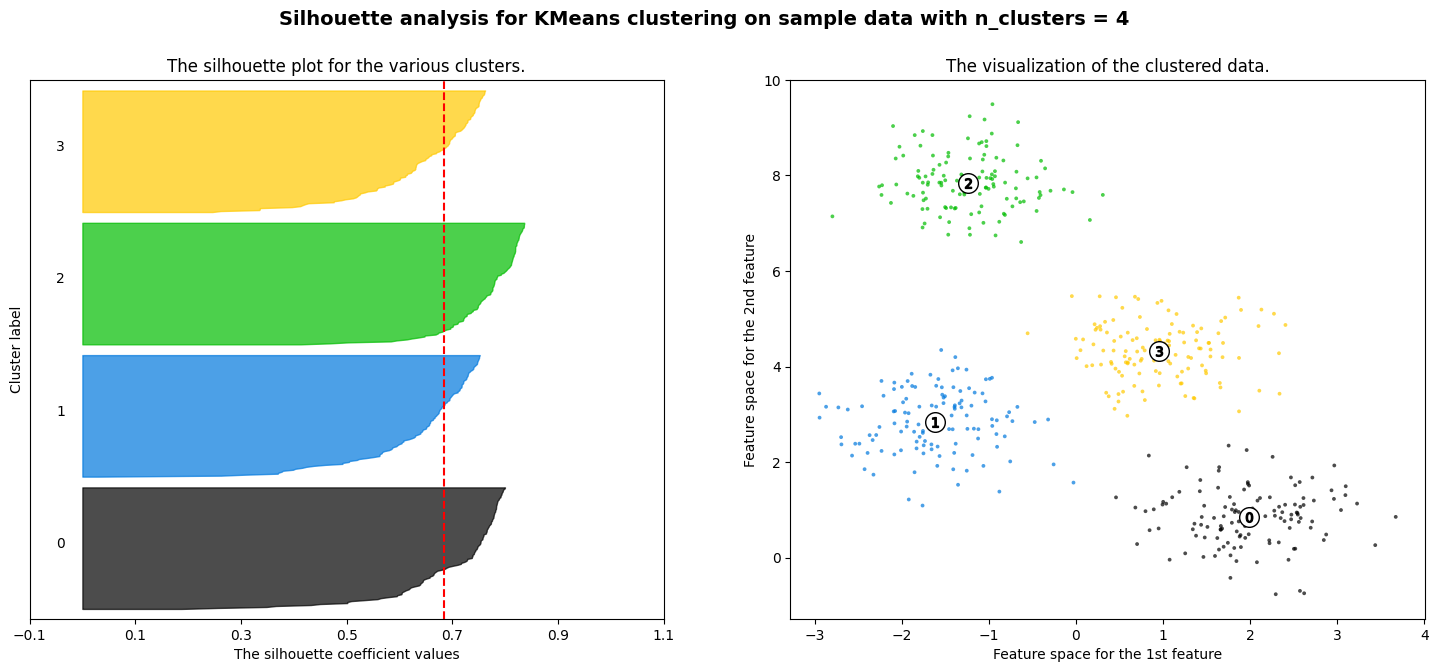

In [10]:
# Generate sample data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Number of clusters
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Compute the silhouette scores for each sample
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    cluster_i = sample_silhouette_values[cluster_labels == i]
    cluster_i.sort()
    y_upper = y_lower + cluster_i.shape[0]

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * cluster_i.shape[0], str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# Visualization of clustered data
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Draw white circles at cluster centers
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

The same happens as the number of clusters increases. It can also be noticed that the thickness of the silhouettes keeps decreasing as the number of clusters increases, because there are less samples in each cluster.

## Rand Index

Another commonly used metric is the Rand Index. It computes a similarity measure between two clusters by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The formula of the Rand Index is:

$$RI = \frac{\text{Number of Agreeing Pair}}{\text{Number of All Pair}}$$

The only drawback of Rand Index is that it assumes that we can find the ground-truth clusters labels and use them to compare the performance of our model, so it is much less useful than the Silhouette Score for pure Unsupervised Learning tasks.

To calculate the Rand Index:

```python
from sklearn.metrics import rand_score
```

## Adjusted Rand Index

Rand index adjusted for chance.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

$$ARI = \frac{RI - Expected\_RI}{max(RI) - Expected\_RI}$$

The Adjusted Rand Index, similarly to RI, ranges from zero to one, with zero equating to random labelling and one when the clusters are identical.

Similarly to RI, to calculate the ARI:
```python
from sklearn.metrics import adjusted_mutual_info_score
```

## Mutual Information

The Mutual Information is another metric often used in evaluating the performance of Clustering algorithms. It is a measure of the similarity between two labels of the same data. Where $|U_i|$ is the number of the samples in cluster $U_i$ and $|V_j|$ is the number of the samples in cluster $V_j$, the Mutual Information between clusters $U$ and $V$ is given as:

$$ MI(U, V) = \sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i \cap V_j|}{N} \log \frac{N |U_i \cap V_j|}{|U_i| |V_j|}$$

Similarly to Rand Index, one of the major drawbacks of this metric is requiring to know the ground truth labels a priori for the distribution. Something which is almost never true in real-life scenarios with Custering.

Using Sklearn:
```python
from sklearn.metrics import mutual_info_score
```

## Calinski-Harabasz Index

Calinski-Harabasz Index is also known as the Variance Ratio Criterion.

The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The C-H Index is a great way to evaluate the performance of a Clustering algorithm as it does not require information on the ground truth labels.

The higher the Index, the better the performance.

The formula is:

$$CH = \frac{Tr(B_k)}{Tr(W_k)} \times \frac{N - k}{k - 1}$$

where:
- $Tr(B_k)$ is the trace of the between-cluster dispersion matrix,
- $Tr(W_k)$ is the trace of the within-cluster dispersion matrix,
- $N$ is the number of samples, and
- $k$ is the number of clusters.

$Tr(B_k)$ is defined as:

$$Tr(B_k) = \sum_{q=1}^k n_q \times (C_q - C_E) \times (C_q, C_E)^T$$

where:
- $n_q$ is the number of samples in cluster $q$,
- $C_q$ is the centroid of cluster $q$,
- $C_E$ is the centroid of the entire population.

And $Tr(W_k)$ is defined as:

$$Tr(W_k) = \sum_{q=1}^k \sum_{x \in C_q} (x - C_q) \times (x - C_q)^T$$

where:
- $x$ is a sample in cluster $q$.

```python
from sklearn.metrics import calinski_harabasz_score
```

## Davies-Bouldin Index

The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. Similarity is the ratio of within-cluster distances to between-cluster distances. In this way, clusters which are farther apart and less dispersed will lead to a better score.

The minimum score is zero, and differently from most performance metrics, the lower values the better clustering performance.

Similarly to the Silhouette Score, the D-B Index does not require the a-priori knowledge of the ground-truth labels, but has a simpler implementation in terms of fomulation than Silhouette Score.

```python
from sklearn.metrics import davies_bouldin_score
```

### Example on every type of metric

Let's start with some similiar data

In [11]:
# Example using a built-in dataset (e.g., Iris dataset)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [14]:
# Calculate clustering metrics
silhouette = silhouette_score(X, kmeans.labels_)
db_index = davies_bouldin_score(X, kmeans.labels_)
ch_index = calinski_harabasz_score(X, kmeans.labels_)
ari = adjusted_rand_score(iris.target, kmeans.labels_)
mi = mutual_info_score(iris.target, kmeans.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")
print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Mutual Information (MI): {mi:.2f}")

Silhouette Score: 0.55
Davies-Bouldin Index: 0.67
Calinski-Harabasz Index: 561.59
Adjusted Rand Index: 0.72
Mutual Information (MI): 0.81


**Interpret the Metrics**

Analyze the metric scores to assess the quality of your clustering results. Higher scores are generally better. Here’s an interpretation of the metric scores obtained:
- ***Silhouette Score (0.55)***: This score reveals how similar data points are inside their clusters when compared to data points from other clusters. A result of 0.55 indicates that there is some separation between the clusters, but there is still space for improvement. Closer to 1 values suggest better-defined clusters.
- ***Davies-Bouldin Index (0.66)***: This index calculates the average similarity between each cluster and its closest neighbors. A lower score is preferable, and 0.66 suggests a pretty strong separation across clusters.
- ***The Calinski-Harabasz Index (561.63)***: calculates the ratio of between-cluster variation to within-cluster variance. Higher values suggest more distinct groups. Your clusters are distinct and independent with a score of 561.63.
- ***The Adjusted Rand Index (0.73)*** compares the resemblance of genuine class labels to predicted cluster labels. A rating of 0.73 shows that the clustering findings and the actual class labels correspond rather well.
- ***Mutual Information (MI) (0.75)***: This metric measures the agreement between the true class labels and the predicted cluster labels. A score of 0.75 indicates a substantial amount of shared information between the true labels and the clusters assigned by the algorithm. It signifies that the clustering solution captures a significant portion of the underlying structure in the data, aligning well with the actual class labels.